# Obectif 1:prédire les compétences qui seront les plus demandées sur le marché du travail

In [ ]:
### Initialisation de la connexion à la base de données "newdwadmission" sous PostgreSQL

In [8]:
import pandas as pd
from sqlalchemy import create_engine, text
from sqlalchemy.exc import OperationalError

# === Paramètres de connexion ===
host = "localhost"
port = "5432"
database = "newdwadmission"
username = "postgres"
password = "azerty"

# === Connexion à PostgreSQL ===
db_url = f"postgresql+psycopg2://{'postgres'}:{'azerty'}@{'localhost'}:{5432}/{'newdwadmission'}"


try:
    engine = create_engine(db_url)

    # Test de connexion
    with engine.connect() as connection:
        result = connection.execute(text("SELECT version();"))
        version = result.fetchone()
        print("✅ Connexion réussie à PostgreSQL !")
        print("📦 Version PostgreSQL :", version[0])

    # === Import des tables nécessaires pour le clustering ===
    df_emploiyabilite = pd.read_sql('SELECT * FROM "fact_employabilite";', engine)
    df_profil = pd.read_sql('SELECT * FROM "Dim_profil";', engine)
    df_candidat = pd.read_sql('SELECT * FROM "Dim_candidat";', engine)
    df_diplome = pd.read_sql('SELECT * FROM "dim_diplome";', engine)
    df_offre = pd.read_sql('SELECT * FROM "Dim_offre";', engine)  # Optionnel selon ton besoin
    df_dates = pd.read_sql("SELECT * FROM dimdates", engine)

    # === Aperçu rapide ===
    print("\n📊 Aperçu de fact_employabilite :")
    print(df_emploiyabilite.head())

    print("\n👤 Aperçu de Dim_profil :")
    print(df_profil.head())

    print("\n🎓 Aperçu de dim_diplome :")
    print(df_diplome.head())

    print("\n🧍 Aperçu de Dim_candidat :")
    print(df_candidat.head())

    print("\n💼 Aperçu de Dim_offre :")
    print(df_offre.head())

except OperationalError as e:
    print("❌ Erreur de connexion à la base de données :")
    print(e)


✅ Connexion réussie à PostgreSQL !
📦 Version PostgreSQL : PostgreSQL 15.10, compiled by Visual C++ build 1942, 64-bit

📊 Aperçu de fact_employabilite :
   fk_profil   fk_date  fk_localisation  fk_offre date_offre date_diplome  \
0          8  20221231                1        37       2022         2022   
1         11  20211231                1       186       2021         2021   
2        286  20231231                1       300       2023         2023   
3        291  20201231                1       162       2020         2020   
4        292  20221231                1        37       2022         2022   

           salaire position_date  
0  35 k € - 45 k €    2022-09-01  
1  35 k € - 45 k €           N\A  
2  56 k € | 32 k €    2023-06-01  
3  35 k € - 45 k €    2024-01-01  
4  35 k € - 45 k €    2022-09-01  

👤 Aperçu de Dim_profil :
   pk_profil                full_name                  current_position  \
0          1         Yasmine Ben Abda              Data Engineer Intern   

In [ ]:
# Analyse exploratoire des données

In [9]:
  import pandas as pd

# Afficher les premières lignes des DataFrames
print("🎓 Aperçu de fact_employabilite :")
print(df_emploiyabilite.head())

print("\n📚 Aperçu de Dim_offre :")
print(df_offre.head())

print("\n📅 Aperçu de dimdates :")
print(df_dates.head())

print("\n💼 Aperçu de dim_profil :")
print(df_profil.head())

print("\n🎓 Aperçu de dim_diplome :")
print(df_diplome.head())

print("\n🎓 Aperçu de dim_candidat :")
print(df_candidat.head())

# Afficher la taille des datasets (lignes, colonnes)
print("\n🎓 Taille de fact_employabilite :", df_emploiyabilite.shape)
print("📚 Taille de Dim_offre :", df_offre.shape)
print("📅 Taille de dimdates :", df_dates.shape)
print("💼 Taille de dim_profil :", df_profil.shape)
print("🎓 Taille de dim_diplome :", df_diplome.shape)
print("🎓 Taille de dim_candidat :", df_candidat.shape)

# Afficher les noms des colonnes
print("\n🎓 Colonnes de fact_employabilite :", df_emploiyabilite.columns)
print("📚 Colonnes de Dim_offre :", df_offre.columns)
print("📅 Colonnes de dimdates :", df_dates.columns)
print("💼 Colonnes de dim_profil :", df_profil.columns)
print("🎓 Colonnes de dim_diplome :", df_diplome.columns)
print("🎓 Colonnes de dim_candidat :", df_candidat.columns)

# Aperçu global des DataFrames (types des colonnes, valeurs nulles, etc.)
print("\n🎓 Aperçu de fact_employabilite :")
print(df_emploiyabilite.info())

print("\n📚 Aperçu de Dim_offre :")
print(df_offre.info())

print("\n📅 Aperçu de dimdates :")
print(df_dates.info())

print("\n💼 Aperçu de dim_profil :")
print(df_profil.info())

print("\n🎓 Aperçu de dim_diplome :")
print(df_diplome.info())

print("\n🎓 Aperçu de dim_candidat :")
print(df_candidat.info())

# Statistiques descriptives des colonnes numériques (si présentes)
print("\n🎓 Statistiques descriptives de fact_employabilite :")
print(df_emploiyabilite.describe())

print("\n📚 Statistiques descriptives de Dim_offre :")
print(df_offre.describe())

print("\n📅 Statistiques descriptives de dimdates :")
print(df_dates.describe())

print("\n💼 Statistiques descriptives de dim_profil :")
print(df_profil.describe())

print("\n🎓 Statistiques descriptives de dim_diplome :")
print(df_diplome.describe())

print("\n🎓 Statistiques descriptives de dim_candidat :")
print(df_candidat.describe())

🎓 Aperçu de fact_employabilite :
   fk_profil   fk_date  fk_localisation  fk_offre date_offre date_diplome  \
0          8  20221231                1        37       2022         2022   
1         11  20211231                1       186       2021         2021   
2        286  20231231                1       300       2023         2023   
3        291  20201231                1       162       2020         2020   
4        292  20221231                1        37       2022         2022   

           salaire position_date  
0  35 k € - 45 k €    2022-09-01  
1  35 k € - 45 k €           N\A  
2  56 k € | 32 k €    2023-06-01  
3  35 k € - 45 k €    2024-01-01  
4  35 k € - 45 k €    2022-09-01  

📚 Aperçu de Dim_offre :
   pk_offre code_offre       Secteur  \
0         9       3300  informatique   
1       187       7119          data   
2       193       9877          data   
3        82       3790         genie   
4         1       2272  informatique   

                            

In [ ]:
#Vérification des valeurs manquantes

In [10]:
# Fonction pour afficher les valeurs manquantes pour chaque DataFrame
def missing_values_analysis(df, table_name):
    print(f"Analyse des valeurs manquantes pour la table : {table_name}")
    
    # Nombre de valeurs manquantes par colonne
    print("Nombre de valeurs manquantes par colonne :")
    print(df.isnull().sum())
    
    # Pourcentage de valeurs manquantes par colonne
    print("\nPourcentage de valeurs manquantes par colonne :")
    print(df.isnull().mean() * 100)
    print("\n")

# Appliquer l'analyse à chaque table que tu utilises pour ton projet
missing_values_analysis(df_emploiyabilite, "fact_employabilite")
missing_values_analysis(df_offre, "dim_offre")
missing_values_analysis(df_dates, "dimdates")
missing_values_analysis(df_profil, "dim_profil")
missing_values_analysis(df_diplome, "dim_diplome")
missing_values_analysis(df_candidat, "dim_candidat")


Analyse des valeurs manquantes pour la table : fact_employabilite
Nombre de valeurs manquantes par colonne :
fk_profil          0
fk_date            0
fk_localisation    0
fk_offre           0
date_offre         0
date_diplome       0
salaire            0
position_date      0
dtype: int64

Pourcentage de valeurs manquantes par colonne :
fk_profil          0.0
fk_date            0.0
fk_localisation    0.0
fk_offre           0.0
date_offre         0.0
date_diplome       0.0
salaire            0.0
position_date      0.0
dtype: float64


Analyse des valeurs manquantes pour la table : dim_offre
Nombre de valeurs manquantes par colonne :
pk_offre      0
code_offre    0
Secteur       0
Offre         0
Competence    0
dtype: int64

Pourcentage de valeurs manquantes par colonne :
pk_offre      0.0
code_offre    0.0
Secteur       0.0
Offre         0.0
Competence    0.0
dtype: float64


Analyse des valeurs manquantes pour la table : dimdates
Nombre de valeurs manquantes par colonne :
date_pk     

In [ ]:
# Types de variables (numériques vs catégoriques)

In [11]:
# Fonction pour afficher les variables numériques et catégoriques pour chaque DataFrame
def analyze_columns(df, table_name):
    print(f"Analyse des colonnes pour la table : {table_name}")
    
    # Variables numériques
    num_vars = df.select_dtypes(include=['int64', 'float64']).columns
    print("Variables numériques :", list(num_vars))
    
    # Variables catégoriques
    cat_vars = df.select_dtypes(include=['object']).columns
    print("Variables catégoriques :", list(cat_vars))
    print("\n")

# Appliquer l'analyse à chaque table que tu utilises pour ton projet
analyze_columns(df_emploiyabilite, "fact_emploiyabilité")
analyze_columns(df_offre, "dim_offre")
analyze_columns(df_dates, "dimdates")
analyze_columns(df_profil, "dim_profil")
analyze_columns(df_diplome, "dim_diplome")
analyze_columns(df_candidat, "dim_candidat")

Analyse des colonnes pour la table : fact_emploiyabilité
Variables numériques : ['fk_profil', 'fk_date', 'fk_localisation', 'fk_offre']
Variables catégoriques : ['date_offre', 'date_diplome', 'salaire', 'position_date']


Analyse des colonnes pour la table : dim_offre
Variables numériques : ['pk_offre']
Variables catégoriques : ['code_offre', 'Secteur', 'Offre', 'Competence']


Analyse des colonnes pour la table : dimdates
Variables numériques : ['date_pk', 'annee', 'mois', 'jour', 'id_lib_jour', 'semaine', 'jourdeannee']
Variables catégoriques : ['date', 'jour_moi_annee', 'id_semestre', 'semestre', 'id_trimestre', 'trimestre', 'id_mois', 'lib_mois', 'lib_jour', 'jour_mois_lettre']


Analyse des colonnes pour la table : dim_profil
Variables numériques : ['pk_profil']
Variables catégoriques : ['full_name', 'current_position', 'location', 'skills', 'industry', 'time_in_company', 'changed_job', 'company_name', 'email']


Analyse des colonnes pour la table : dim_diplome
Variables numérique

In [ ]:
# Encodage des Variables Catégorielles

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Fonction pour encoder les variables catégorielles avec LabelEncoder
def apply_label_encoding(df, cat_vars):
    """
    Applique l'encodage LabelEncoder sur les colonnes catégorielles spécifiées d'un DataFrame.
    
    :param df: DataFrame contenant les données
    :param cat_vars: Liste des colonnes catégorielles à encoder
    :return: DataFrame avec les variables catégorielles encodées
    """
    le = LabelEncoder()
    for col in cat_vars:
        if col in df.columns:
            df[col] = le.fit_transform(df[col].astype(str))
        else:
            print(f"⚠️ Colonne {col} non trouvée dans le DataFrame.")
    return df

# Définir les variables catégorielles pour chaque DataFrame
cat_vars_employabilite = ['date_offre', 'date_diplome', 'salaire', 'position_date']
cat_vars_offre = ['code_offre', 'Secteur', 'Offre', 'Competence']
cat_vars_dates = ['date', 'jour_moi_annee', 'id_semestre', 'semestre', 'id_trimestre', 
                  'trimestre', 'id_mois', 'lib_mois', 'lib_jour', 'jour_mois_lettre']
cat_vars_profil = ['full_name', 'current_position', 'location', 'skills', 'industry', 
                   'time_in_company', 'changed_job', 'company_name', 'email']
cat_vars_diplome = ['code_diplome', 'specialite', 'mention', 'type_diplome']
cat_vars_candidat = ['situation_economique', 'code_candidat', 'sexe', 
                     'resultat', 'orientation', 'code_pays']

# Appliquer l'encodage
df_fact_employabilite = apply_label_encoding(df_emploiyabilite, cat_vars_employabilite)
df_dim_offre = apply_label_encoding(df_offre, cat_vars_offre)
df_dimdates = apply_label_encoding(df_dates, cat_vars_dates)
df_dim_profil = apply_label_encoding(df_profil, cat_vars_profil)
df_dim_diplome = apply_label_encoding(df_diplome, cat_vars_diplome)
df_dim_candidat = apply_label_encoding(df_candidat, cat_vars_candidat)

# Aperçu des DataFrames encodés
print("\n📈 fact_employabilite encodé :")
print(df_fact_employabilite.head())

print("\n💼 dim_offre encodé :")
print(df_dim_offre.head())

print("\n📅 dimdates encodé :")
print(df_dimdates.head())

print("\n👤 dim_profil encodé :")
print(df_dim_profil.head())

print("\n🎓 dim_diplome encodé :")
print(df_dim_diplome.head())

print("\n🧑‍🎓 dim_candidat encodé :")
print(df_dim_candidat.head())



📈 fact_employabilite encodé :
   fk_profil   fk_date  fk_localisation  fk_offre  date_offre  date_diplome  \
0          8  20221231                1        37           2             2   
1         11  20211231                1       186           1             1   
2        286  20231231                1       300           3             3   
3        291  20201231                1       162           0             0   
4        292  20221231                1        37           2             2   

   salaire  position_date  
0        0             34  
1        0             63  
2        1             43  
3        0             50  
4        0             34  

💼 dim_offre encodé :
   pk_offre  code_offre  Secteur  Offre  Competence
0         9         104        7     96           3
1       187         248        3     73         202
2       193         369        3     50         150
3        82         119        6    172          66
4         1          68        7     47     

In [ ]:
# Vérification des valeurs uniques par colonne après encodage

In [14]:
# 📊 fact_employabilite
print("\n📊 Valeurs uniques dans 'fact_employabilite' :")
for col in cat_vars_employabilite:
    if col in df_fact_employabilite.columns:
        uniques = sorted(df_fact_employabilite[col].unique())
        print(f" - {col} : {uniques}")

# 💼 dim_offre
print("\n💼 Valeurs uniques dans 'dim_offre' :")
for col in cat_vars_offre:
    if col in df_dim_offre.columns:
        uniques = sorted(df_dim_offre[col].unique())
        print(f" - {col} : {uniques}")

# 📅 dimdates
print("\n📅 Valeurs uniques dans 'dimdates' :")
for col in cat_vars_dates:
    if col in df_dimdates.columns:
        uniques = sorted(df_dimdates[col].unique())
        print(f" - {col} : {uniques}")

# 👤 dim_profil
print("\n👤 Valeurs uniques dans 'dim_profil' :")
for col in cat_vars_profil:
    if col in df_dim_profil.columns:
        uniques = sorted(df_dim_profil[col].unique())
        print(f" - {col} : {uniques}")

# 🎓 dim_diplome
print("\n🎓 Valeurs uniques dans 'dim_diplome' :")
for col in cat_vars_diplome:
    if col in df_dim_diplome.columns:
        uniques = sorted(df_dim_diplome[col].unique())
        print(f" - {col} : {uniques}")

# 🧑‍🎓 dim_candidat
print("\n🧑‍🎓 Valeurs uniques dans 'dim_candidat' :")
for col in cat_vars_candidat:
    if col in df_dim_candidat.columns:
        uniques = sorted(df_dim_candidat[col].unique())
        print(f" - {col} : {uniques}")



📊 Valeurs uniques dans 'fact_employabilite' :
 - date_offre : [0, 1, 2, 3, 4]
 - date_diplome : [0, 1, 2, 3, 4]
 - salaire : [0, 1]
 - position_date : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]

💼 Valeurs uniques dans 'dim_offre' :
 - code_offre : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 1

In [ ]:
# Aperçu élargi des DataFrames encodés (20 premières lignes)

In [15]:
# 📊 fact_employabilite
print("\n📊 Aperçu élargi de 'fact_employabilite' (20 premières lignes) :")
print(df_fact_employabilite.head(20))

# 💼 dim_offre
print("\n💼 Aperçu élargi de 'dim_offre' (20 premières lignes) :")
print(df_dim_offre.head(20))

# 📅 dimdates
print("\n📅 Aperçu élargi de 'dimdates' (20 premières lignes) :")
print(df_dimdates.head(20))

# 👤 dim_profil
print("\n👤 Aperçu élargi de 'dim_profil' (20 premières lignes) :")
print(df_dim_profil.head(20))

# 🎓 dim_diplome
print("\n🎓 Aperçu élargi de 'dim_diplome' (20 premières lignes) :")
print(df_dim_diplome.head(20))

# 🧑‍🎓 dim_candidat
print("\n🧑‍🎓 Aperçu élargi de 'dim_candidat' (20 premières lignes) :")
print(df_dim_candidat.head(20))



📊 Aperçu élargi de 'fact_employabilite' (20 premières lignes) :
    fk_profil   fk_date  fk_localisation  fk_offre  date_offre  date_diplome  \
0           8  20221231                1        37           2             2   
1          11  20211231                1       186           1             1   
2         286  20231231                1       300           3             3   
3         291  20201231                1       162           0             0   
4         292  20221231                1        37           2             2   
5         293  20211231                1       186           1             1   
6         716  20201231                1       162           0             0   
7        1492  20211231               12       186           1             1   
8          17  20221231                1        37           2             2   
9         295  20201231                1       162           0             0   
10        183  20201231               13       162     

In [ ]:
#Analyse de corrélation

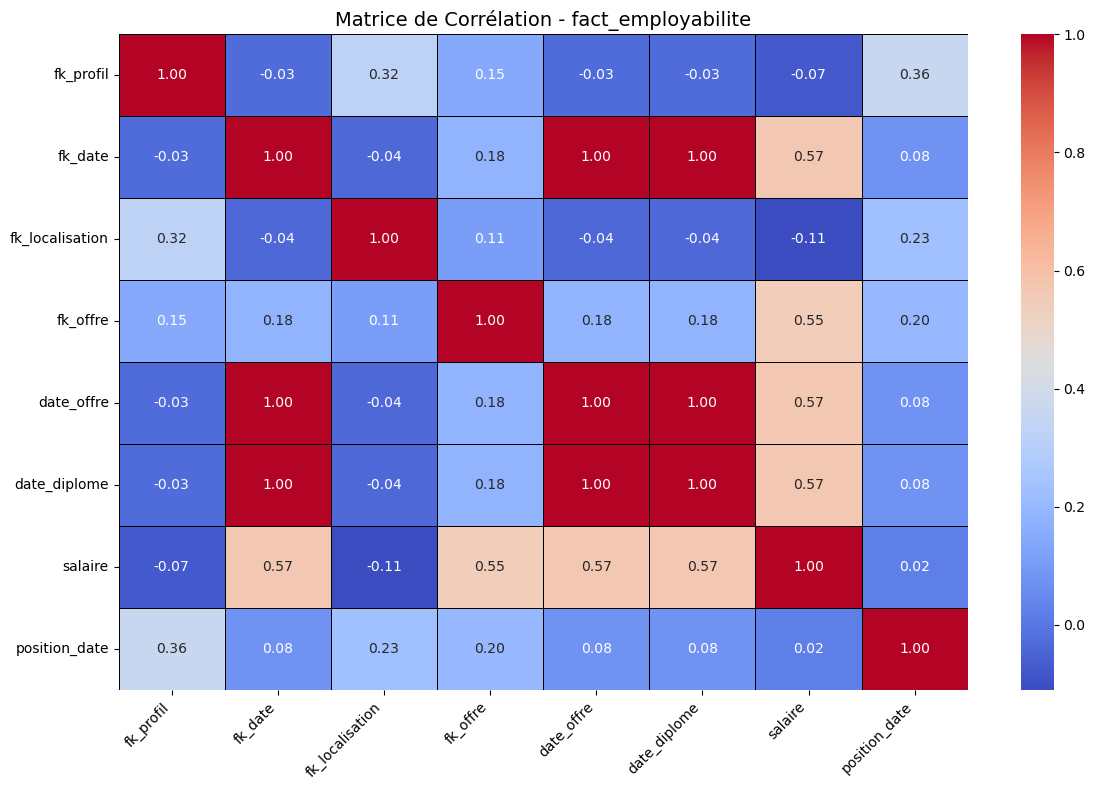

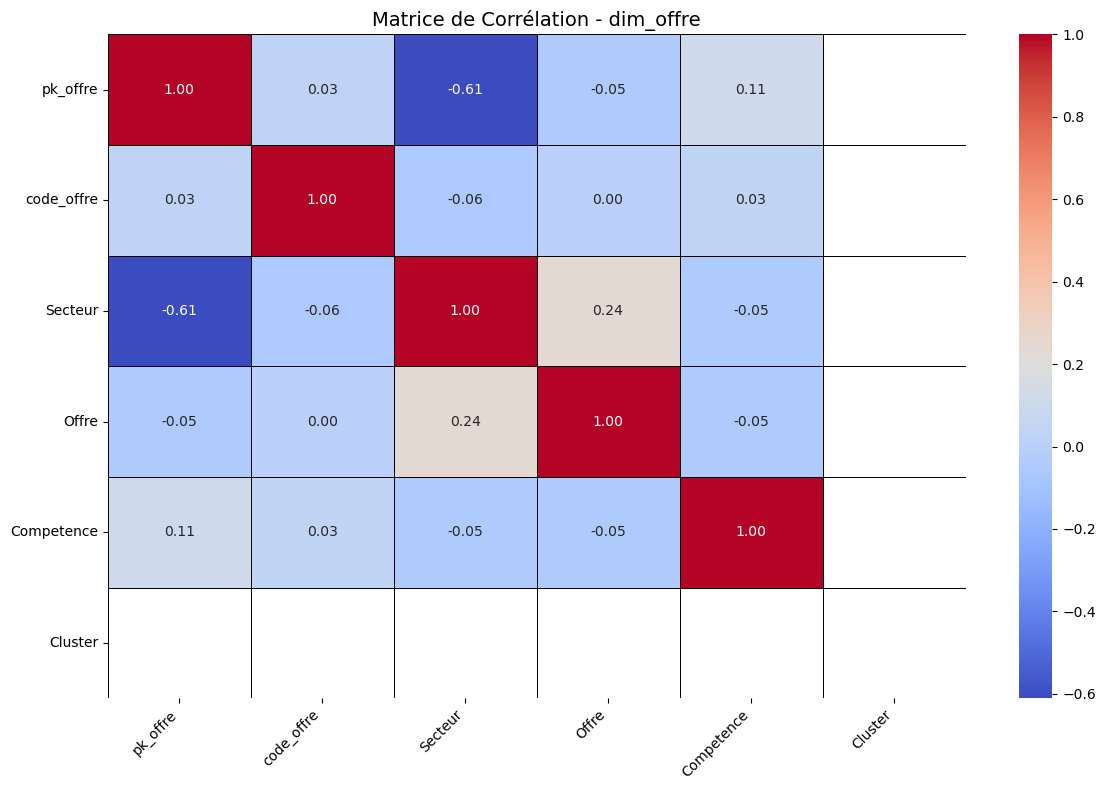

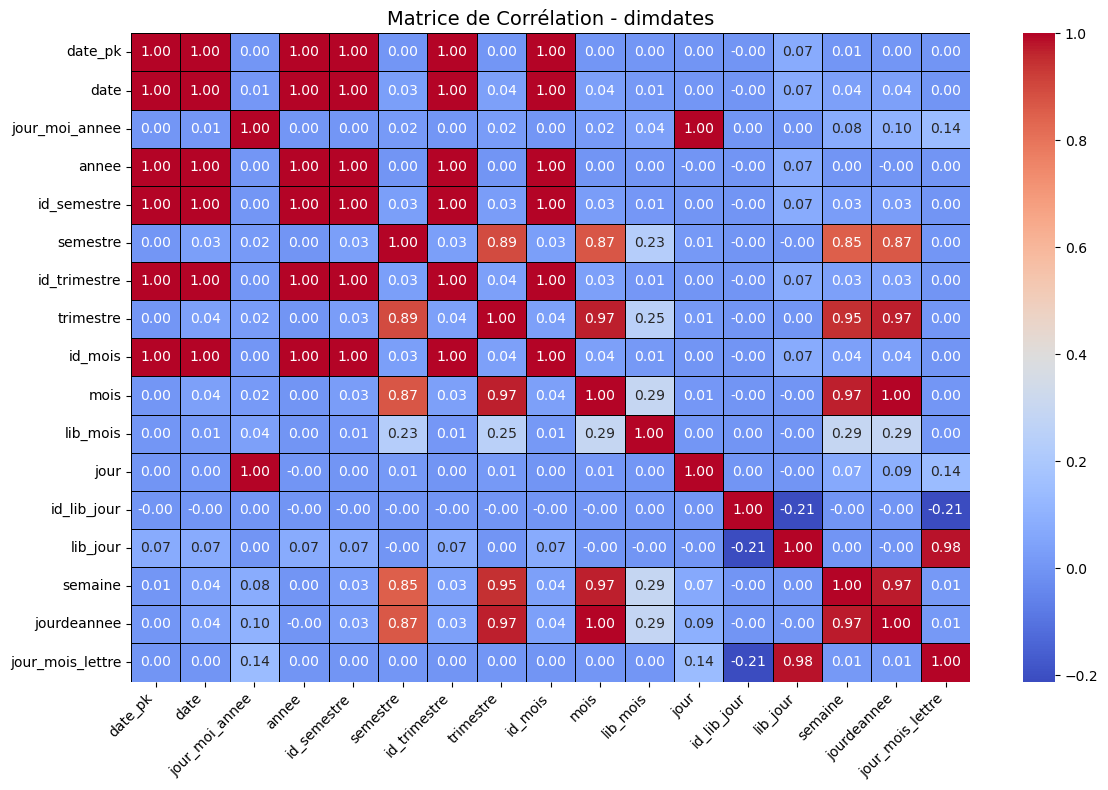

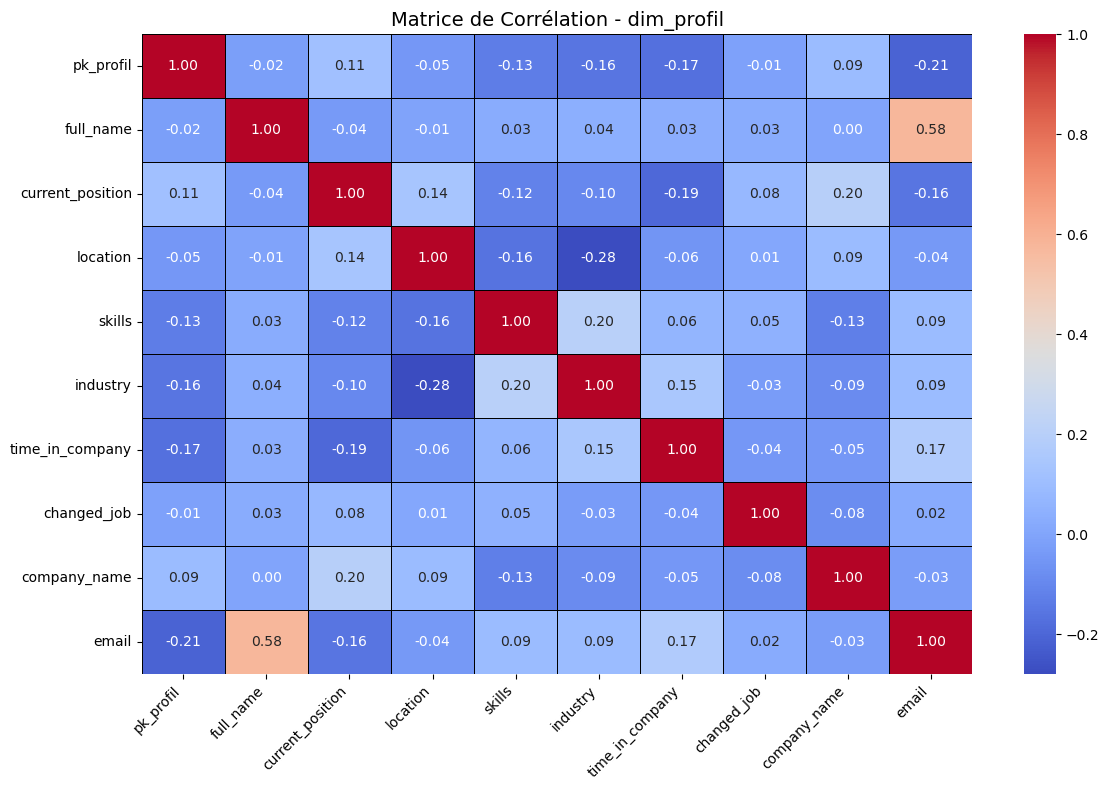

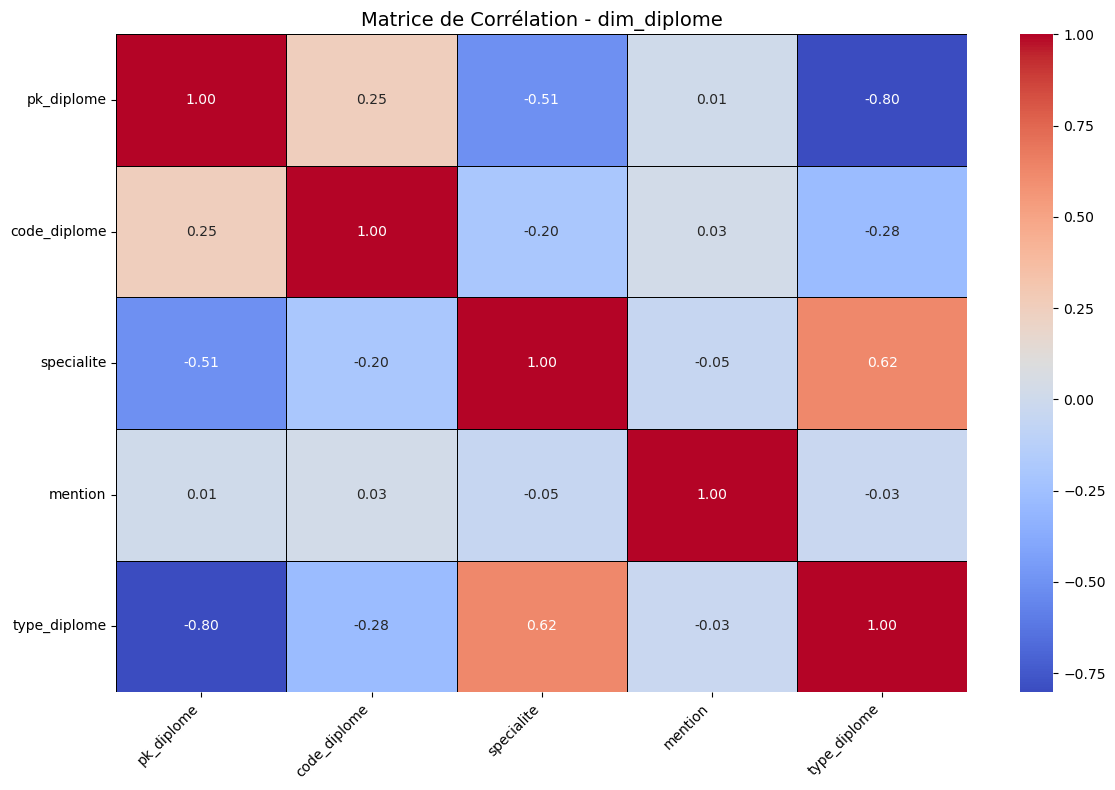

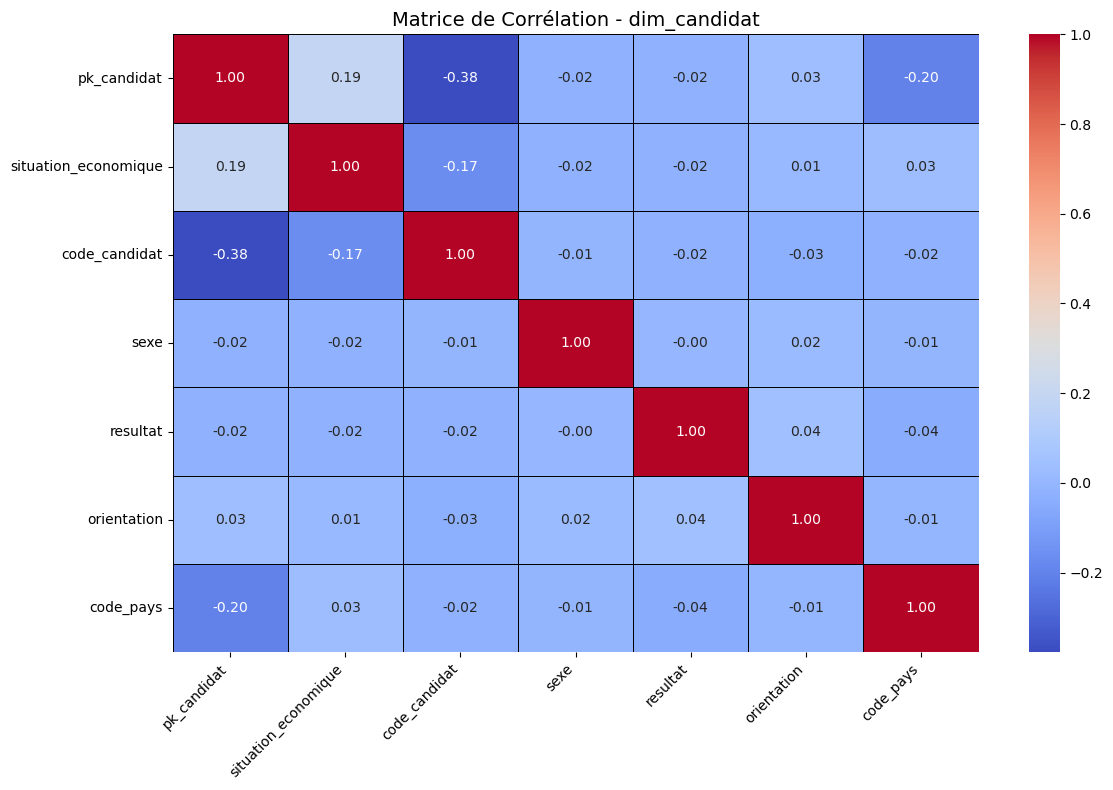

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Fusionner les tables encodées
df_complet = pd.concat([
    df_fact_employabilite, 
    df_dim_offre, 
    df_dimdates, 
    df_dim_profil, 
    df_dim_diplome, 
    df_dim_candidat
], axis=1)

# Sélectionner les variables numériques
num_vars = df_complet.select_dtypes(include=['number']).columns

# Option : grouper les colonnes par catégories pour des affichages séparés
groupes = {
    'fact_employabilite': df_fact_employabilite.select_dtypes(include='number').columns,
    'dim_offre': df_dim_offre.select_dtypes(include='number').columns,
    'dimdates': df_dimdates.select_dtypes(include='number').columns,
    'dim_profil': df_dim_profil.select_dtypes(include='number').columns,
    'dim_diplome': df_dim_diplome.select_dtypes(include='number').columns,
    'dim_candidat': df_dim_candidat.select_dtypes(include='number').columns
}

# Boucler sur les groupes pour afficher plusieurs heatmaps
for nom_groupe, colonnes in groupes.items():
    if len(colonnes) > 1:  # Afficher la heatmap uniquement si plus d'une variable
        corr_matrix = df_complet[colonnes].corr()
        plt.figure(figsize=(12, 8))
        sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True,
                    linewidths=0.5, linecolor='black')
        plt.title(f"Matrice de Corrélation - {nom_groupe}", fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()


In [32]:
import os
os.environ['OMP_NUM_THREADS'] = '2'


Colonnes sélectionnées pour X_dim_offre : Index(['pk_offre'], dtype='object')
Variance des colonnes :
pk_offre    13209.573187
dtype: float64
Colonnes après suppression des variables constantes : Index(['pk_offre'], dtype='object')


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score : 0.6063239067884366


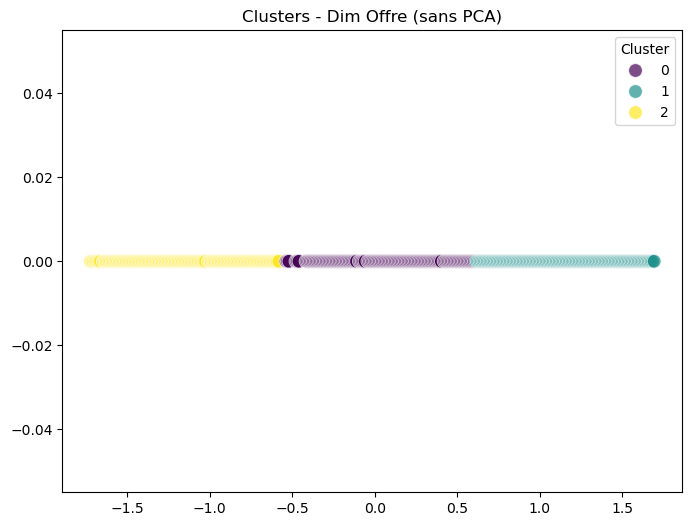

Centroids des clusters :
[[ 0.06500712]
 [ 1.15220151]
 [-1.15216721]]


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score pour 2 clusters : 0.6263369697648808


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score pour 3 clusters : 0.6063239067884366


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score pour 4 clusters : 0.5609240522281508


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score pour 5 clusters : 0.567364954591395


In [35]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# Définir la variable d'environnement avant l'exécution du clustering pour éviter la fuite de mémoire sur Windows
os.environ['OMP_NUM_THREADS'] = '2'

# Supposons que df_dim_offre soit votre DataFrame d'origine
# 1. Sélectionner les colonnes numériques pour le clustering
X_dim_offre = df_dim_offre.select_dtypes(include=['float64', 'int64'])
print(f"Colonnes sélectionnées pour X_dim_offre : {X_dim_offre.columns}")

# 2. Vérification de la variance des colonnes
variances = X_dim_offre.var()
print(f"Variance des colonnes :\n{variances}")

# 3. Supprimer les colonnes avec une variance nulle
X_dim_offre_non_const = X_dim_offre.loc[:, variances > 0]
print(f"Colonnes après suppression des variables constantes : {X_dim_offre_non_const.columns}")

# 4. Appliquer la standardisation des données
scaler = StandardScaler()
X_dim_offre_scaled = scaler.fit_transform(X_dim_offre_non_const)

# 5. Appliquer KMeans pour le clustering (sans PCA), avec n_init explicite pour éviter le warning FutureWarning
kmeans_offre = KMeans(n_clusters=3, n_init=10, random_state=42)  # Ajoutez n_init=10 ici
df_dim_offre['Cluster'] = kmeans_offre.fit_predict(X_dim_offre_scaled)

# 6. Calculer le Silhouette Score pour évaluer la qualité du clustering
silhouette_avg = silhouette_score(X_dim_offre_scaled, df_dim_offre['Cluster'])
print(f"Silhouette Score : {silhouette_avg}")

# 7. Visualisation des clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_dim_offre_scaled[:, 0], y=[0] * len(X_dim_offre_scaled), hue=df_dim_offre['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('Clusters - Dim Offre (sans PCA)')
plt.show()

# Si vous souhaitez vérifier les centres des clusters pour mieux comprendre le modèle
centroids = kmeans_offre.cluster_centers_
print(f"Centroids des clusters :\n{centroids}")

# 8. Tester différentes valeurs de n_clusters
for n_clusters in range(2, 6):  # Tester de 2 à 5 clusters
    kmeans_offre = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)  # Ajoutez n_init=10 ici aussi
    df_dim_offre['Cluster'] = kmeans_offre.fit_predict(X_dim_offre_scaled)
    silhouette_avg = silhouette_score(X_dim_offre_scaled, df_dim_offre['Cluster'])
    print(f"Silhouette Score pour {n_clusters} clusters : {silhouette_avg}")


In [ ]:
#Appliquer l'Algorithme DBSCAN (Density-Based Spatial Clustering of Applications with Noise). 

Colonnes sélectionnées pour X_dim_offre : Index(['pk_offre'], dtype='object')
Variance des colonnes :
pk_offre    13209.573187
dtype: float64
Colonnes après suppression des variables constantes : Index(['pk_offre'], dtype='object')
Impossible d'appliquer PCA ou DBSCAN car le nombre de colonnes après filtrage est insuffisant.
Nombre de clusters trouvés (sans PCA) : 1
Pas assez de clusters valides pour calculer le Silhouette Score.


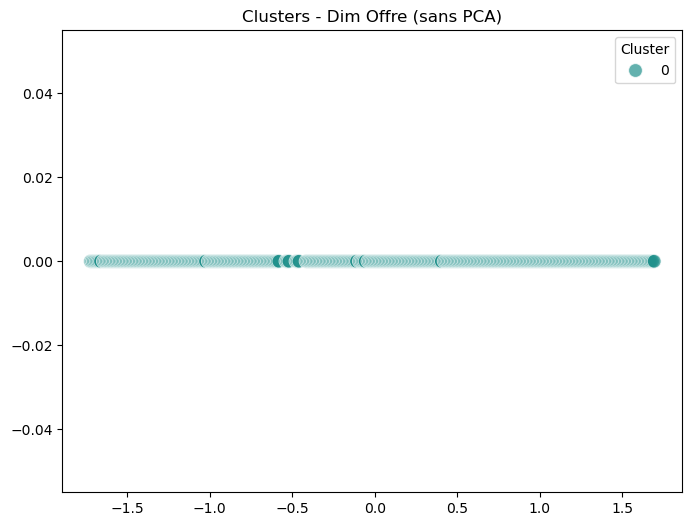

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Sélectionner uniquement les variables numériques dans df_dim_offre
X_dim_offre = df_dim_offre.select_dtypes(include=['float64', 'int64'])
print(f"Colonnes sélectionnées pour X_dim_offre : {X_dim_offre.columns}")

# Vérification de la variance des colonnes
variances = X_dim_offre.var()
print(f"Variance des colonnes :\n{variances}")

# Supprimer les colonnes avec une variance nulle
X_dim_offre_non_const = X_dim_offre.loc[:, variances > 0]
print(f"Colonnes après suppression des variables constantes : {X_dim_offre_non_const.columns}")

# Paramètres DBSCAN
eps_value = 0.5  # Ajustez ce paramètre selon vos données
min_samples_value = 5  # Ajustez ce paramètre selon vos données

# Si nous avons suffisamment de caractéristiques, normaliser les données
if X_dim_offre_non_const.shape[1] > 1:  # S'assurer qu'il y a plus d'une colonne
    scaler = StandardScaler()
    X_dim_offre_scaled = scaler.fit_transform(X_dim_offre_non_const)
    
    # Appliquer PCA pour réduire les dimensions à 2
    pca = PCA(n_components=2)
    X_pca_offre = pca.fit_transform(X_dim_offre_scaled)
    
    # Appliquer DBSCAN pour le clustering
    dbscan_offre = DBSCAN(eps=eps_value, min_samples=min_samples_value)
    df_dim_offre['Cluster'] = dbscan_offre.fit_predict(X_pca_offre)
    
    # Vérification du nombre de clusters
    unique_clusters = df_dim_offre['Cluster'].nunique()
    print(f"Nombre de clusters trouvés : {unique_clusters}")
    
    # Calculer la silhouette si plus d'un cluster est trouvé
    if unique_clusters > 1:
        # Calculer la silhouette pour évaluer la qualité du clustering
        df_dim_offre_no_noise = df_dim_offre[df_dim_offre['Cluster'] != -1]
        silhouette_avg = silhouette_score(X_pca_offre[df_dim_offre_no_noise.index], df_dim_offre_no_noise['Cluster'])
        print(f"Silhouette Score : {silhouette_avg}")
    else:
        print("Pas assez de clusters valides pour calculer le Silhouette Score.")
    
    # Visualisation des clusters après réduction avec PCA
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca_offre[:, 0], y=X_pca_offre[:, 1], hue=df_dim_offre['Cluster'], palette='viridis', s=100, alpha=0.7)
    plt.title('Clusters après réduction avec PCA - Dim Offre (DBSCAN)')
    plt.show()
    
else:
    print("Impossible d'appliquer PCA ou DBSCAN car le nombre de colonnes après filtrage est insuffisant.")
    
    # Appliquer DBSCAN directement si une seule colonne reste
    scaler = StandardScaler()
    X_dim_offre_scaled = scaler.fit_transform(X_dim_offre_non_const)
    dbscan_offre = DBSCAN(eps=eps_value, min_samples=min_samples_value)
    df_dim_offre['Cluster'] = dbscan_offre.fit_predict(X_dim_offre_scaled)
    
    # Vérification du nombre de clusters
    unique_clusters = df_dim_offre['Cluster'].nunique()
    print(f"Nombre de clusters trouvés (sans PCA) : {unique_clusters}")
    
    # Calculer la silhouette si plus d'un cluster est trouvé
    if unique_clusters > 1:
        df_dim_offre_no_noise = df_dim_offre[df_dim_offre['Cluster'] != -1]
        silhouette_avg = silhouette_score(X_dim_offre_scaled[df_dim_offre_no_noise.index], df_dim_offre_no_noise['Cluster'])
        print(f"Silhouette Score : {silhouette_avg}")
    else:
        print("Pas assez de clusters valides pour calculer le Silhouette Score.")
    
    # Visualisation des clusters sans PCA
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_dim_offre_scaled[:, 0], y=[0] * len(X_dim_offre_scaled), hue=df_dim_offre['Cluster'], palette='viridis', s=100, alpha=0.7)
    plt.title('Clusters - Dim Offre (sans PCA)')
    plt.show()


# Obectif 2:prédire les compétences qui seront les plus demandées sur le marché du travailSegmenter les candidats en groupes selon leurs compétences, expériences et diplômes pour identifier des profils types.